In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import seaborn as sns

### 分析腸病毒健保門診及住院就診人次

In [3]:
df =pd.read_csv('https://od.cdc.gov.tw/eic/NHI_EnteroviralInfection.csv')

In [4]:
len(df)

128882

In [5]:
df

,年,週,就診類別,年齡別,縣市,腸病毒健保就診人次,健保就診總人次
0,2008,14,住院,0-2,台中市,0,105
1,2008,14,住院,0-2,台北市,2,151
2,2008,14,住院,0-2,台東縣,0,14
3,2008,14,住院,0-2,台南市,0,20
4,2008,14,住院,0-2,宜蘭縣,0,44
5,2008,14,住院,0-2,花蓮縣,0,17
6,2008,14,住院,0-2,金門縣,0,1
7,2008,14,住院,0-2,屏東縣,0,19
8,2008,14,住院,0-2,苗栗縣,0,1
9,2008,14,住院,0-2,桃園市,0,141


### 健保就診總人次最多的地區

In [6]:
df[df['健保就診總人次']==df['健保就診總人次'].max()]

,年,週,就診類別,年齡別,縣市,腸病毒健保就診人次,健保就診總人次
119946,2019,5,門診,15+,新北市,109,898783


### 健保就診總人次最少的地區

In [7]:
df[df['健保就診總人次']==df['健保就診總人次'].min()]

,年,週,就診類別,年齡別,縣市,腸病毒健保就診人次,健保就診總人次
25668,2010,29,住院,10-14,澎湖縣,0,0
28255,2010,41,住院,3-4,澎湖縣,0,0
31808,2011,6,住院,10-14,花蓮縣,0,0
32289,2011,8,住院,3-4,澎湖縣,0,0
56653,2013,19,住院,10-14,澎湖縣,0,0
56858,2013,20,住院,10-14,雲林縣,0,0
56913,2013,20,住院,5-9,金門縣,0,0


### 資料繪圖

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1cbc7ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1cbc7ac8>)

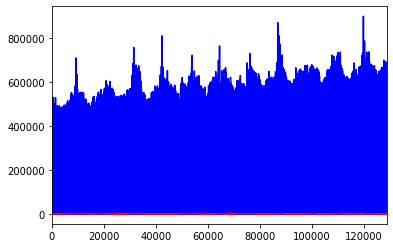

In [8]:
df.健保就診總人次.plot(color='b'),df.腸病毒健保就診人次.plot(color='r')